In [2]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Step 1: Reading and Understanding the Data

Let's start with the following steps:

1. Importing data using the pandas library
2. Understanding the structure of the data

In [3]:
cars = pd.read_csv('data/CarPrice_Assignment.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.shape

(205, 26)

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
cars.corr()['price']

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

### Step 2 : Data Cleaning and Preparation

### Step 3: Visualizing the datam

Curb weight is the weight of the vehicle, including a full tank of fuel and all standard equipment.

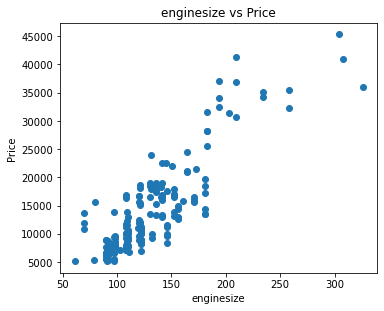

In [8]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(cars[x],cars['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10,20))


scatter('enginesize', 4)

plt.tight_layout()

In [9]:
X = cars['enginesize']
X

0      130
1      130
2      152
3      109
4      136
      ... 
200    141
201    141
202    173
203    145
204    141
Name: enginesize, Length: 205, dtype: int64

In [10]:
X = cars[['enginesize']]
X.shape

(205, 1)

In [11]:
y = cars['price']
y.shape

(205,)

In [14]:
def h(x, w):
    return np.dot(x, w)

In [17]:
x_0 = np.ones((205,1))
X = np.hstack((x_0, X))
X

array([[  1., 130.],
       [  1., 130.],
       [  1., 152.],
       [  1., 109.],
       [  1., 136.],
       [  1., 136.],
       [  1., 136.],
       [  1., 136.],
       [  1., 131.],
       [  1., 131.],
       [  1., 108.],
       [  1., 108.],
       [  1., 164.],
       [  1., 164.],
       [  1., 164.],
       [  1., 209.],
       [  1., 209.],
       [  1., 209.],
       [  1.,  61.],
       [  1.,  90.],
       [  1.,  90.],
       [  1.,  90.],
       [  1.,  90.],
       [  1.,  98.],
       [  1.,  90.],
       [  1.,  90.],
       [  1.,  90.],
       [  1.,  98.],
       [  1., 122.],
       [  1., 156.],
       [  1.,  92.],
       [  1.,  92.],
       [  1.,  79.],
       [  1.,  92.],
       [  1.,  92.],
       [  1.,  92.],
       [  1.,  92.],
       [  1., 110.],
       [  1., 110.],
       [  1., 110.],
       [  1., 110.],
       [  1., 110.],
       [  1., 110.],
       [  1., 111.],
       [  1.,  90.],
       [  1.,  90.],
       [  1., 119.],
       [  1.,

In [18]:
h(X[0], w=[1000, 0.5])

1065.0

In [19]:
w = [0.001, -0.001]

In [20]:
alpha = 0.001

In [21]:
def grad(X, y, w):
    X @ w

In [22]:
X @ w

array([-0.129, -0.129, -0.151, -0.108, -0.135, -0.135, -0.135, -0.135,
       -0.13 , -0.13 , -0.107, -0.107, -0.163, -0.163, -0.163, -0.208,
       -0.208, -0.208, -0.06 , -0.089, -0.089, -0.089, -0.089, -0.097,
       -0.089, -0.089, -0.089, -0.097, -0.121, -0.155, -0.091, -0.091,
       -0.078, -0.091, -0.091, -0.091, -0.091, -0.109, -0.109, -0.109,
       -0.109, -0.109, -0.109, -0.11 , -0.089, -0.089, -0.118, -0.257,
       -0.257, -0.325, -0.09 , -0.09 , -0.09 , -0.09 , -0.09 , -0.069,
       -0.069, -0.069, -0.079, -0.121, -0.121, -0.121, -0.121, -0.121,
       -0.121, -0.139, -0.133, -0.182, -0.182, -0.182, -0.182, -0.233,
       -0.233, -0.307, -0.303, -0.139, -0.091, -0.091, -0.091, -0.097,
       -0.109, -0.121, -0.155, -0.155, -0.155, -0.121, -0.121, -0.109,
       -0.109, -0.096, -0.102, -0.096, -0.096, -0.096, -0.096, -0.096,
       -0.096, -0.096, -0.096, -0.119, -0.119, -0.18 , -0.18 , -0.18 ,
       -0.18 , -0.18 , -0.18 , -0.119, -0.151, -0.119, -0.151, -0.119,
      

In [32]:
def grad(X, y, w):
    grad = []
    for i in range(len(X)):
        x_i, y_i = X[i], y[i]
        grad.append((h(x_i,w) - y_i) * x_i)
    grad = np.array(grad)
    
    return np.mean(grad, axis=0)
    

In [33]:
grad(X, y, w)

array([  -13276.83647805, -1974319.00361463])

In [35]:
def loss(X, y, w):
    return np.mean((X @ w - y)**2)

In [37]:
loss(X,y,w)

239785401.55789688

In [39]:
alpha = 0.00001
w = [0.001, -0.001]
for i in range(100):
    w = w - alpha * grad(X, y, w)
    print (loss(X,y,w))

168774287.21989998
120830589.17727776
88461032.75787075
66606476.5532322
51851202.74832536
41889063.47140244
35163045.440232195
30621919.290581547
27555939.51877554
25485916.04781867
24088320.05124846
23144718.58026836
22507634.967523333
22077499.218953565
21787085.895478554
21591007.230409756
21458619.327728756
21369232.727880735
21308878.78482886
21268126.460919134
21240608.3193222
21222025.33661526
21209474.994424745
21200997.635386564
21195270.181921046
21191399.348133467
21188782.025255315
21187011.019812718
21185811.4120336
21184997.587742064
21184444.228115026
21184066.72319553
21183807.9479274
21183629.333894305
21183504.84133652
21183416.88931211
21183353.6079144
21183306.98308554
21183271.604073454
21183243.817767646
21183221.157742806
21183201.958773125
21183185.096568707
21183169.812056687
21183155.59274324
21183142.09261427
21183129.078055702
21183116.391341254
21183103.92598079
21183091.61007671
21183079.395086795
21183067.248237383
21183055.147401102
21183043.077638496
2

Text(0.5, 0, 'engine')

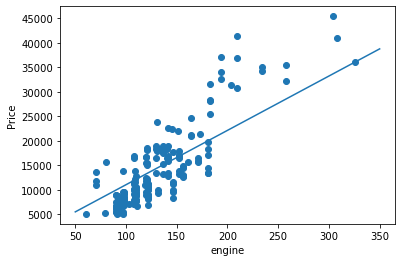

In [41]:
x = np.linspace(50,350,num=1000000)
z = w[0] + w[1]*x
plt.plot(x,z)
plt.scatter(X[:,1],y)
plt.ylabel('Price')
plt.xlabel('engine')

In [42]:
x = [1, 900]
h(x,w)

99649.63691613267